In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics

In [ ]:
df=pd.read_csv("Play Tennis.csv")
value=['Outlook','Temprature','Humidity','Wind']
df

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [ ]:
len(df)

14

In [ ]:
df.shape

(14, 6)

In [ ]:
df.tail()

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
9,D10,Rain,Mild,Normal,Weak,Yes
10,D11,Sunny,Mild,Normal,Strong,Yes
11,D12,Overcast,Mild,High,Strong,Yes
12,D13,Overcast,Hot,Normal,Weak,Yes
13,D14,Rain,Mild,High,Strong,No


In [ ]:
df.describe()

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
count,14,14,14,14,14,14
unique,14,3,3,2,2,2
top,D1,Sunny,Mild,High,Weak,Yes
freq,1,5,6,7,8,9


In [ ]:
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()
df=df.apply(string_to_int.fit_transform)
df

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
0,0,2,1,0,1,0
1,6,2,1,0,0,0
2,7,0,1,0,1,1
3,8,1,2,0,1,1
4,9,1,0,1,1,1
5,10,1,0,1,0,0
6,11,0,0,1,0,1
7,12,2,2,0,1,0
8,13,2,0,1,1,1
9,1,1,2,1,1,1


In [ ]:
feature_cols = ['Outlook','Temprature','Humidity','Wind']
X = df[feature_cols ]
y = df.Play_Tennis

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
# perform training
from sklearn.tree import DecisionTreeClassifier
classifier =DecisionTreeClassifier(criterion="gini", random_state=100)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [ ]:
y_pred= classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6


In [ ]:
pred_data=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
pred_data

,Actual,Predicted
12,1,1
9,1,1
7,0,0
10,1,0
3,1,0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1 0]
 [2 2]]
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.50      0.67         4

    accuracy                           0.60         5
   macro avg       0.67      0.75      0.58         5
weighted avg       0.87      0.60      0.63         5



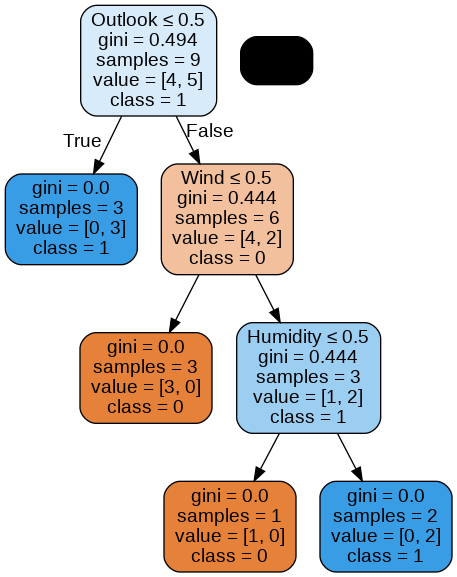

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
filled=True, rounded=True,
special_characters=True,feature_names =value,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Play Tennis.png')
Image(graph.create_png())